In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/train.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16407 entries, 0 to 16406
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   qtype     16407 non-null  object
 1   Question  16407 non-null  object
 2   Answer    16407 non-null  object
dtypes: object(3)
memory usage: 384.7+ KB
None


In [4]:
print(df.head())

             qtype                                           Question  \
0   susceptibility  Who is at risk for Lymphocytic Choriomeningiti...   
1         symptoms  What are the symptoms of Lymphocytic Choriomen...   
2   susceptibility  Who is at risk for Lymphocytic Choriomeningiti...   
3  exams and tests  How to diagnose Lymphocytic Choriomeningitis (...   
4        treatment  What are the treatments for Lymphocytic Chorio...   

                                              Answer  
0  LCMV infections can occur after exposure to fr...  
1  LCMV is most commonly recognized as causing ne...  
2  Individuals of all ages who come into contact ...  
3  During the first phase of the disease, the mos...  
4  Aseptic meningitis, encephalitis, or meningoen...  


In [5]:
print(df.describe())

              qtype                          Question  \
count         16407                             16407   
unique           16                             14979   
top     information  What causes Causes of Diabetes ?   
freq           4535                                20   

                                                   Answer  
count                                               16407  
unique                                              15817  
top     This condition is inherited in an autosomal re...  
freq                                                  348  


In [6]:
print(df.isnull().sum())

qtype       0
Question    0
Answer      0
dtype: int64


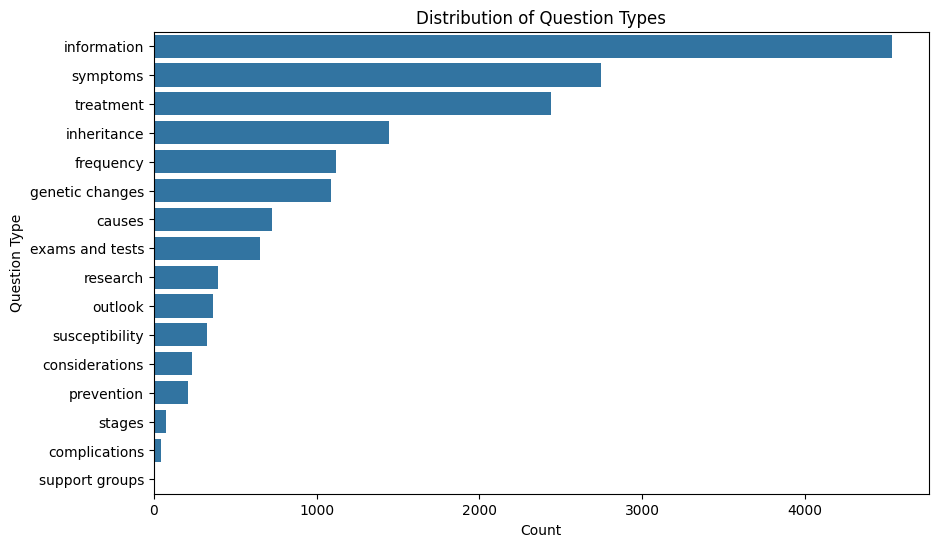

In [7]:
# Distribution of Question Types

plt.figure(figsize=(10, 6))
sns.countplot(y='qtype', data=df, order=df['qtype'].value_counts().index)
plt.title('Distribution of Question Types')
plt.xlabel('Count')
plt.ylabel('Question Type')
plt.show()

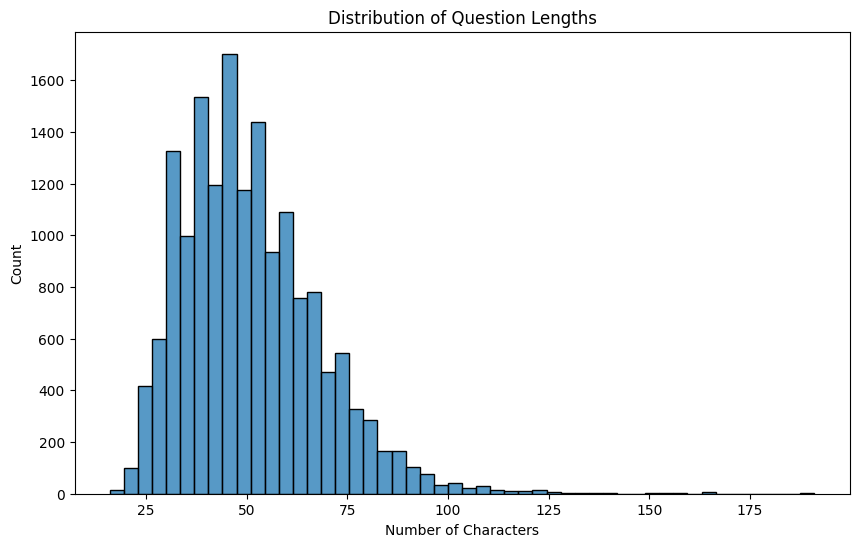

In [8]:
# Distribution of Question Lengths

df['question_length'] = df['Question'].str.len()
plt.figure(figsize=(10,6))
sns.histplot(df['question_length'], bins=50)
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

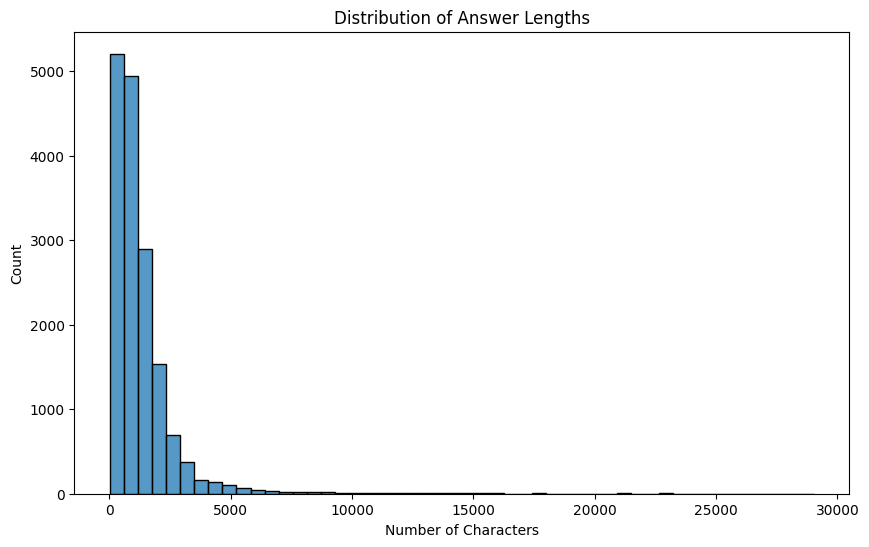

In [9]:
# Distribution of answer lengths

df['answer_length'] = df['Answer'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['answer_length'], bins=50)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

In [10]:
from collections import Counter
import re

def get_top_two_words(text_series, top_n=20):
    words = ' '.join(text_series).lower()
    words = re.findall(r'\w+', words)   # splits the text into individual words and removes any punctuation
    return Counter(words).most_common(top_n)

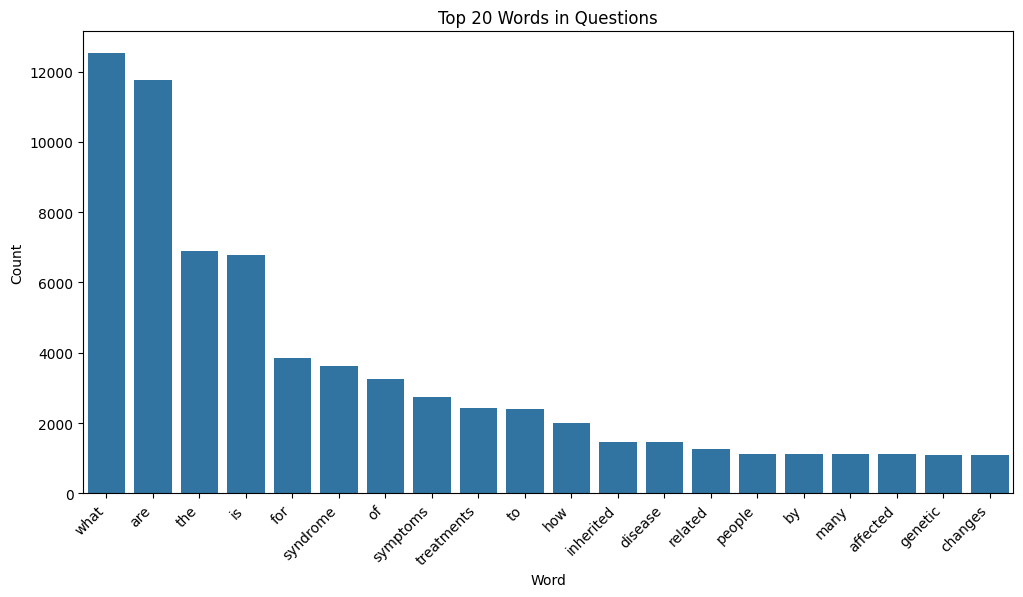

In [11]:
top_question_words = get_top_two_words(df['Question'])
plt.figure(figsize=(12,6))
sns.barplot(x=[word[0] for word in top_question_words], y=[word[1] for word in top_question_words])
plt.title('Top 20 Words in Questions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def get_top_words_no_stop(text_series, top_n=20):
    words = ' '.join(text_series).lower()
    words = re.findall(r'\w+', words)
    return Counter(word for word in words if word not in stop_words).most_common(top_n)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kevinhuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


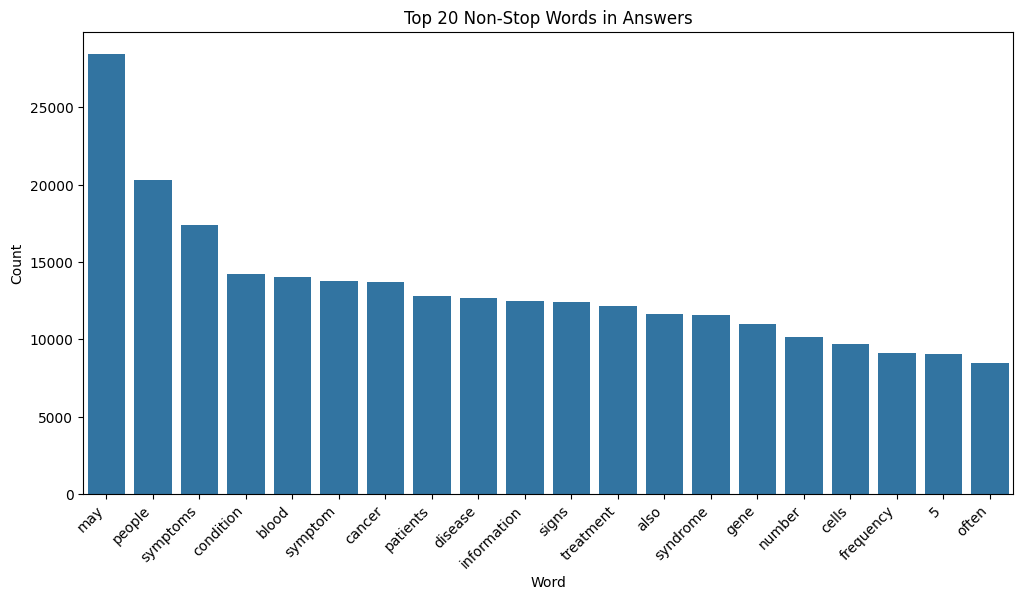

In [13]:
top_answer_words = get_top_words_no_stop(df['Answer'])
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_answer_words], y=[word[1] for word in top_answer_words])
plt.title('Top 20 Non-Stop Words in Answers')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

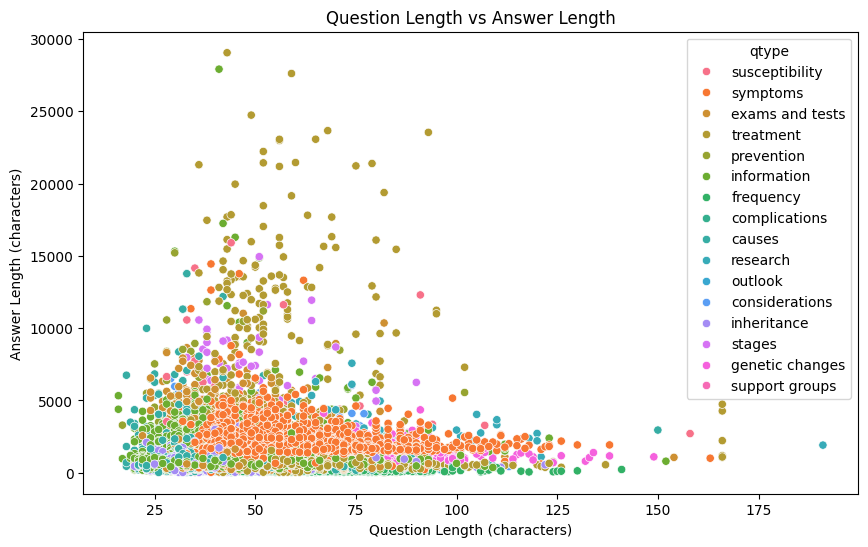

In [14]:
# Analyze question-answer pair lengths

df['qa_length_ratio'] = df['answer_length'] / df['question_length']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='question_length', y='answer_length', hue='qtype', data=df)
plt.title('Question Length vs Answer Length')
plt.xlabel('Question Length (characters)')
plt.ylabel('Answer Length (characters)')
plt.show()